# MATH 210 Introduction to Mathematical Computing

## April 5, 2017

* Example: Federal Electoral District Tax Statistics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Federal Electoral District Tax Statistics

The [Federal Electoral District Tax Statistics (FEDS) (Tax Year 2014)](http://open.canada.ca/data/en/dataset/43824a91-817e-4396-aaaa-9642ac889d38) dataset is available on the [Government of Canada Open Data Portal](http://open.canada.ca/data/en/dataset). Download the data and import it with pandas. Notice that the .csv file has 'latin' encomding.

In [3]:
tax = pd.read_csv("FEDS.csv",encoding='latin',usecols=[0,1,2,3,4,5,6])

In [4]:
tax.head()

,Prov/Terr,FED ID,Federal Electoral Districts,Total,Total Income,Net Income,Taxable Income
0,10,10001.0,Avalon,71400,3333671000,3097160000,2994293000
1,10,10002.0,Bonavista--Burin--Trinity,64220,2442884000,2295563000,2176714000
2,10,10003.0,Coast of Bays--Central--Notre Dame,66740,2453971000,2293212000,2185436000
3,10,10004.0,Labrador,20830,1168581000,1092723000,1009531000
4,10,10005.0,Long Range Mountains,75220,2759306000,2575107000,2449807000


In [4]:
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 7 columns):
Prov/Terr                      352 non-null object
FED ID                         338 non-null float64
Federal Electoral Districts    338 non-null object
Total                          352 non-null int64
Total Income                   352 non-null int64
Net Income                     352 non-null int64
Taxable Income                 352 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 19.3+ KB


Notice that the values in the 'Prov/Terr' column are numbers. With a bit of searching, we see that these codes are set by [Elections Canada](http://www.elections.ca/content.aspx?section=res&dir=cir/list&document=index&lang=e).

In [5]:
tax['Prov/Terr'].unique()

array(['10', 'TOTAL', '11', '12', '13', '24', '35', '46', '47', '48', '59',
       '60', '61', '62'], dtype=object)

There are several rows which show totals for each province/territory and so let's remove them.

In [6]:
tax = tax[tax['Prov/Terr'] != 'TOTAL']

And now the list of province/territory codes is:

In [7]:
tax['Prov/Terr'].unique()

array(['10', '11', '12', '13', '24', '35', '46', '47', '48', '59', '60',
       '61', '62'], dtype=object)

### Which province has the highest total income?

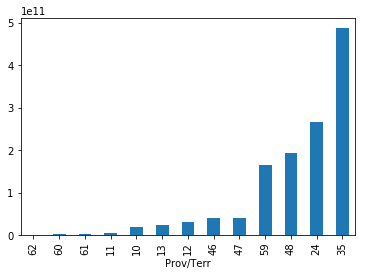

In [8]:
tax.groupby('Prov/Terr')['Total Income'].sum().sort_values().plot(kind='bar')

Ontario has code 35 followed by Quebec (24), Alberta (48) and British Columbia (59).

### Correlation between Total Income and Total Tax Filings per district

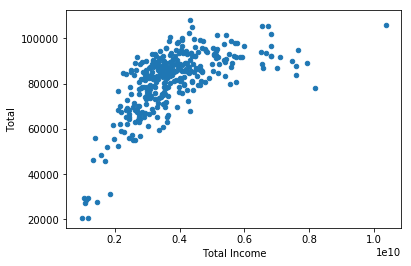

In [9]:
tax.plot(kind='scatter',x='Total Income',y='Total')

Which is the outlier with the highest Total Income?

In [10]:
tax[tax['Total Income'] > 1e10]

,Prov/Terr,FED ID,Federal Electoral Districts,Total,Total Income,Net Income,Taxable Income
270,48,48004.0,Calgary Centre,105930,10365857000,9736574000,9344159000


### Visualize Regions by Color

Let's make a new column with the first digit of the province/territory code. This groups different regions together:

* 1 = Newfoundland and Labrador, Prince Edward Island, Nova Scotia, New Brunswick
* 2 = Quebec
* 3 = Ontario
* 4 = Manitoba, Saskatchewan, Alberta
* 5 = British Columbia
* 6 = Yukon, Northwest Territories, Nunavut

In [11]:
tax['Province'] = tax['Prov/Terr'].map(lambda code : int(code[0]))

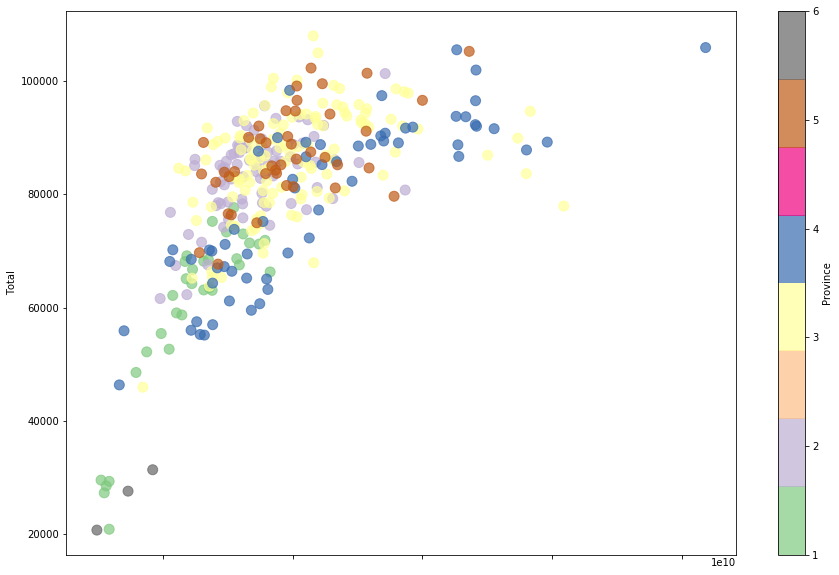

In [12]:
tax.plot(kind='scatter',x='Total Income',y='Total',c='Province',figsize=(15,10),colormap='Accent',s=100,alpha=0.7)